In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
        
    def decision(y):
        if y >= 0.0 and y <= 0.5:
            return "No"
        else:
            return "Yes"

    def difficulty(z):
        if z >= 0.0 and z <= 2.0:
            return "Easy"
        elif z > 2.0 and z <= 3.5:
            return "Moderate"
        else: 
            return "Difficult"

    def rate_value(x):
        if x >= 0.0 and x <= 2.0:
            return "Worst"
        elif x > 2.0 and x <= 3.5:
            return "Average"
        else: 
            return "Best"

In [3]:
class DataLoader:
    def __init__(self, file_path):
        self.file_path = file_path

    def load_data(self):
        try:
            df = pd.read_csv(self.file_path)
            print("Data loaded successfully!")
            return df
        except FileNotFoundError:
            print("File not found. Please provide a valid file path.")
            return None


class DataProcessor(DataLoader):
    def __init__(self, file_path):
        super().__init__(file_path)

    def process_data(self, df):
        # Drop columns with 'url' in their name and count
        url_columns = [col for col in df.columns if 'url' in col or 'count' in col]
        df.drop(columns=url_columns, inplace=True)

        # Drop specified columns
        columns_to_drop = ['faq', 'photos', 'interviews_experience', 'career_opportunities_distribution',
                           'details_industry', 'details_website', 'ratings_rated_ceo','id','details_size','details_founded','details_type']
        df.drop(columns=columns_to_drop, inplace=True)

        # Fill NaN values in 'diversity_inclusion_score' with mean
        mean_diversity_score = df['diversity_inclusion_score'].mean()
        df['diversity_inclusion_score'].fillna(mean_diversity_score, inplace=True)

        # Split 'details_headquarters' column
        df[['HQ_city', 'Country']] = df['details_headquarters'].str.split(',', expand=True)

        # Convert 'timestamp' to datetime
        df['timestamp'] = pd.to_datetime(df['timestamp'])

        # Create 'recency' column
        max_date = df['timestamp'].max()
        df['recency'] = (max_date - df['timestamp']).dt.days
        drop_column = ['timestamp','details_headquarters','region','details_revenue']
        df.drop(columns= drop_column, inplace = True)
        
        return df
        
    def apply_rating_function(self, df):
        rating_columns = ['ratings_career_opportunities', 'ratings_compensation_benefits',
                          'ratings_cutlure_values', 'diversity_inclusion_score',
                          'ratings_senior_management', 'ratings_work_life_balance']

        for col in rating_columns:
            df[col + '_new' ] = df[col].apply(rate_value)
            
    def apply_difficulty(self, df):
        """Apply rating function to specific columns."""
        difficulty_columns = ['interview_difficulty']

        for col in difficulty_columns:
            df[col + '_new' ] = df[col].apply(difficulty)

    def apply_decision(self,df):
        decision_columns = ['ratings_ceo_approval','ratings_recommend_to_friend','ratings_business_outlook']

        for col in decision_columns:
            df[col +'_new'] = df[col].apply(decision)

        print("Rating function applied successfully!")
    
class DataAnalyzer(DataProcessor):
    def __init__(self, file_path):
        super().__init__(file_path)

    def analyze_data(self):
        df = self.load_data()
        if df is not None:
            df_processed = self.process_data(df)
            
            # Explore data
            print("Summary Statistics:")
            print(df_processed.describe())

            # Distribution of ratings_overall
            sns.histplot(df_processed['ratings_overall'], kde=True)
            plt.title('Distribution of Overall Ratings')
            plt.show()

            # Visualize data
            plt.figure(figsize=(10, 6))
            sns.boxplot(x='company_type', y='ratings_overall', data=df_processed)
            plt.title('Overall Ratings by Company Type')
            plt.show()

            # Further analysis
            size_ratings = df_processed.groupby('company_type')['ratings_business_outlook'].mean()
            print("Average Ratings by Company type:")
            print(size_ratings)

            plt.figure(figsize=(10, 6))
            bar_plot = sns.barplot(x= df_processed.company_type, y= df_processed.ratings_work_life_balance.values, data=df_processed, palette='husl')
            plt.title('Work-Life Balance')
            plt.xlabel(' Distribution of work-life balance ')
            plt.ylabel('Count')
            plt.show()

            #Create the bar chart
            plt.figure(figsize=(10, 6))
            bar_plot = sns.barplot(x= df_processed.company_type, y= df_processed.ratings_career_opportunities.values, data=df_processed, palette='cool')
            plt.title('Business Outlook')
            plt.xlabel(' Distribution of Career Opportunities ')
            plt.ylabel('Count')
            plt.show()

            # Generate report
            with open('report.txt', 'w') as f:
                f.write("Summary Statistics:\n")
                f.write(df_processed.describe().to_string())
                f.write("\n\nAverage Ratings by Company Size:\n")
                f.write(size_ratings.to_string())
            print("Report generated successfully!")




Data loaded successfully!
Rating function applied successfully!
                                             company  ratings_overall  \
0                                        Brightlands              3.8   
1  Ordine dei Medici Chirurghi e Odontoiatri Prov...              4.0   
2                                      F&C Engineers              4.0   
3                                 Minuteman Mortgage              4.1   
4                                   Fathom Computing              5.0   

  company_type  ratings_career_opportunities  ratings_ceo_approval  \
0      Private                           3.5                   1.0   
1       Public                           5.0                   0.0   
2      Private                           4.5                   0.0   
3        Other                           4.1                   0.0   
4      Private                           5.0                   0.0   

   ratings_compensation_benefits  ratings_cutlure_values  \
0               

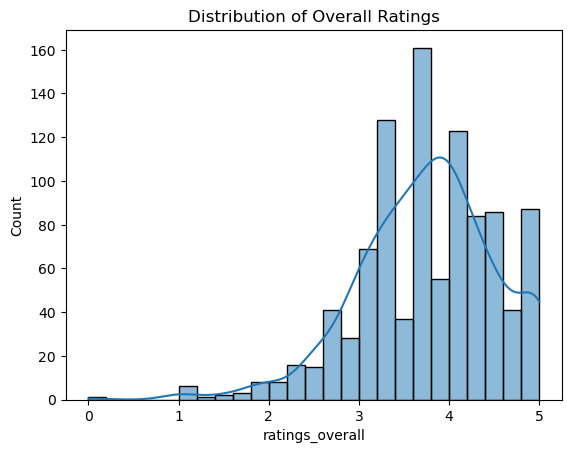

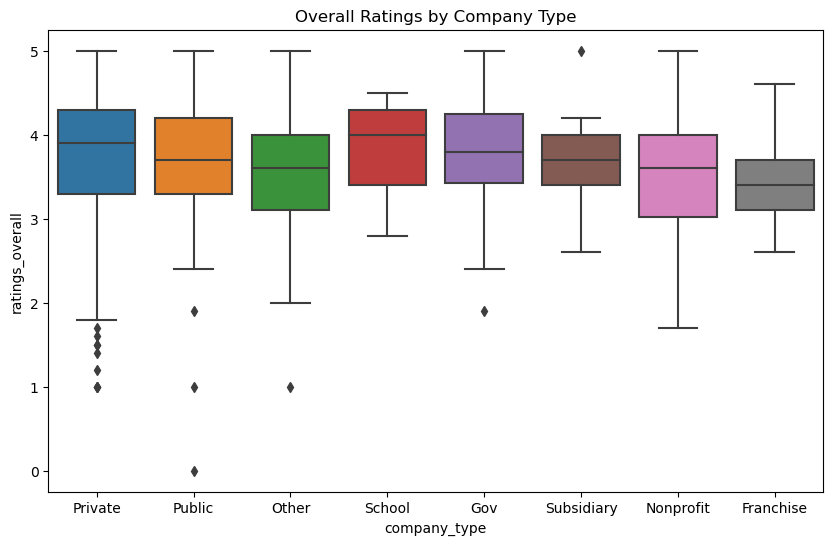

Average Ratings by Company type:
company_type
Franchise     0.400000
Gov           0.617333
Nonprofit     0.475517
Other         0.582143
Private       0.616770
Public        0.607680
School        0.596000
Subsidiary    0.448824
Name: ratings_business_outlook, dtype: float64


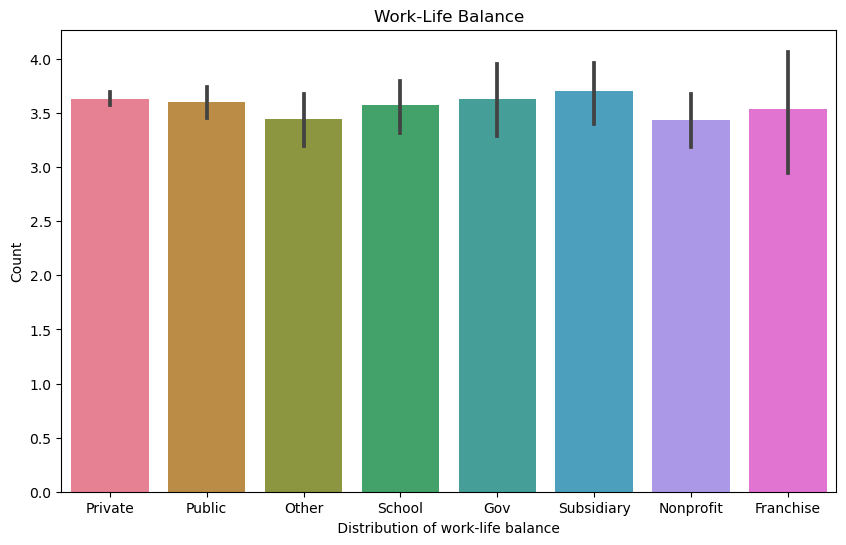

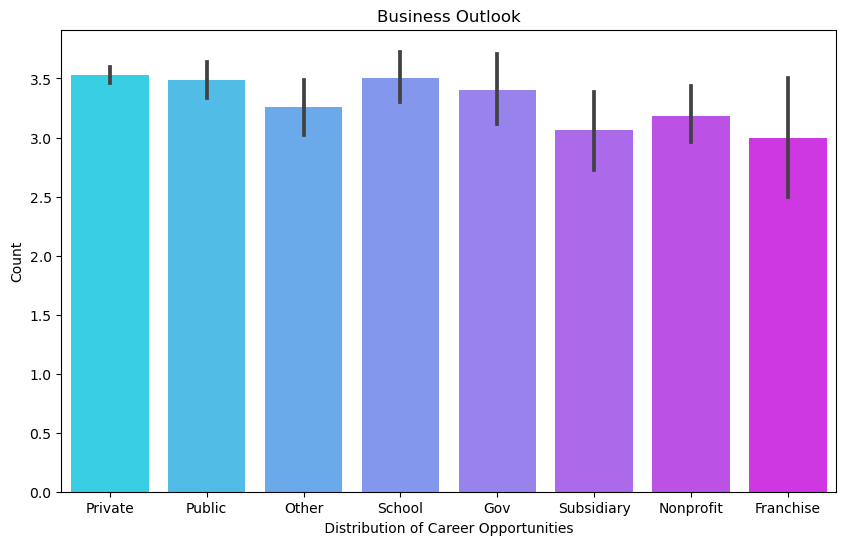

Report generated successfully!


In [5]:
def main():
    file_path = './Glassdoor companies review dataset.csv'  # Replace with your file path
    data_processor = DataProcessor(file_path)
    df = data_processor.load_data()
    
    if df is not None:
        df_processed = data_processor.process_data(df)
        data_processor.apply_rating_function(df_processed)
        data_processor.apply_difficulty(df_processed)
        data_processor.apply_decision(df_processed)
        print(df_processed.head())
    data_analyzer = DataAnalyzer(file_path)
    data_analyzer.analyze_data()

if __name__ == "__main__":
    main()